# Regresion Logística

Github : https://github.com/DanielRasho/MD-Proyecto2/blob/main/LogisticRegression.ipynb

- Daniel Alfredo Rayo Roldan
- Geraro Gabriel Pineda Riveiro

In [46]:
# Core Libraries
import random

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import normaltest

# Machine Learning - Scikit-learn
from sklearn import datasets, metrics, tree
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import (
    confusion_matrix, explained_variance_score, mean_absolute_error, ConfusionMatrixDisplay,
    mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score,accuracy_score, precision_score, recall_score, f1_score, classification_report
)
from sklearn.metrics import root_mean_squared_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import (
    GridSearchCV, ShuffleSplit, cross_validate, train_test_split
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import cross_val_score, cross_val_predict
# Model Evaluation & Utilities
import setuptools.dist
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [47]:
df = pd.read_csv('./data/train.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Limpieza de datos

Primero, se realizó una descripción del dataset para obtener un resumen estadístico de los datos. Esto nos permite identificar la distribución de las variables, sus valores mínimos y máximos, la media, la mediana y la desviación estándar. Además, ayudó a detectar posibles valores atípicos y comprender mejor la escala de los datos antes de realizar cualquier limpieza o transformación.

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [49]:
NAValues = [(col, count, (count / len(df)) * 100) for col, count in df.isnull().sum().items() if count > 0]

NAVariablesStats = pd.DataFrame(NAValues, columns=["Variable", "Count", "Percentage"])
NAVariablesStats = NAVariablesStats.sort_values("Count", ascending=False)
NAVariablesStats

,Variable,Count,Percentage
16,PoolQC,1453,99.520548
18,MiscFeature,1406,96.301370
1,Alley,1369,93.767123
17,Fence,1179,80.753425
2,MasVnrType,872,59.726027
10,FireplaceQu,690,47.260274
0,LotFrontage,259,17.739726
11,GarageType,81,5.547945
12,GarageYrBlt,81,5.547945
13,GarageFinish,81,5.547945


### Criterios de eliminacion de columnas

Dado que el dataset contiene una gran cantidad de datos, primero realizamos una búsqueda para identificar las columnas con al menos un valor nulo. Posteriormente, analizamos el porcentaje de valores faltantes en cada una de estas columnas. Si el porcentaje de datos nulos era significativo (considerado alto según nuestro criterio), decidimos eliminarlas para evitar sesgos en el análisis y mejorar la calidad de los datos.

### Columas eliminadas
Las siguientes columnas fueron eliminadas debido a su alto porcentaje de valores nulos, tanto en training como testing:

* PoolQC → 99.52% de datos nulos.
* MiscFeature → 96.30% de datos nulos.
* Alley → 93.77% de datos nulos.
* Fence → 80.75% de datos nulos.
* MasVnrType → 59.73% de datos nulos.
* FireplaceQu → 47.26% de datos nulos.
* GarageQual → 5.55% de datos nulos.
* Id -> Es una variable insignificante que no nos aporta nada.

### Posteriormente

Al ya no existir columnas con un alto numero de valores nulos, ya nos podemos deshacer de las filas que estan incompletas.

In [50]:
# Quitar las columnas con mayor porcentaje de nulos
df.drop(['Id', "Alley", "MasVnrType", "FireplaceQu", "GarageQual", "PoolQC", "Fence", "MiscFeature" ], axis=1, inplace=True)
# Ahora ya se pueden quitar las filas con NA porque son muy pocos
df_cleaned = df.dropna()

# Asegurar que no hayan valores nulos
NAValues = list(df_cleaned.isnull().sum() / len(df_cleaned))
list(value for value in NAValues if value > 0)

[]

# Regresión Logística

Se empezó haciendo las clasificacion categórica de precios: económicos, intermedios y caros, que después fueron codíficadas con variables dicotómicas. A continuación un ejemplo de como se ven los primeros valores para las variables respuesta.

In [51]:
df_cleaned["SalePriceCategory"] = pd.qcut(df_cleaned["SalePrice"], q=3, labels=["Económico", "Intermedio", "Caro"])
df_cleaned["SalePriceCategory"] = df_cleaned["SalePriceCategory"].astype("category")
df_cleaned["TotalSF"] = df_cleaned["TotalBsmtSF"] + df_cleaned["1stFlrSF"] + df_cleaned["2ndFlrSF"]

dummies = pd.get_dummies(df_cleaned["SalePriceCategory"], prefix="Categoria", dtype=int)
dummies.head()

/tmp/ipykernel_3706/3966717520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["SalePriceCategory"] = pd.qcut(df_cleaned["SalePrice"], q=3, labels=["Económico", "Intermedio", "Caro"])
/tmp/ipykernel_3706/3966717520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["SalePriceCategory"] = df_cleaned["SalePriceCategory"].astype("category")
/tmp/ipykernel_3706/3966717520.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,Categoria_Económico,Categoria_Intermedio,Categoria_Caro
0,0,0,1
1,0,1,0
2,0,0,1
3,1,0,0
4,0,0,1


Del conjunto de datos original **25% serán destinados a prueba, y el 75% restantes a entrenamiento**.

In [52]:
# Join new variables
df_cleaned = pd.concat([df_cleaned, dummies], axis=1)
train_set, test_set = train_test_split(df_cleaned, test_size=0.25, random_state=42, stratify=df_cleaned["SalePriceCategory"])

## Análisis de multicolinealidad

En entregas pasados ya se había analizado la correlación entre las variables del dataset con la variable respuesta de **el precio de las casas.**. Se decidió usar el criterio de ignorar a todas las variables que tuvieran un coeficiente de correlación de Pearson menor a 60% (r < 0.6) ya que representan las características con mayor impacto en el valor final de la propiedad. Con base en este criterio, las variables seleccionadas para entrenar el modelo son:

- OverallQual
- TotalSF
- GarageCars
- FullBath
- YearRemodAdd
- Fireplaces
- GrLiveArea
- TotalBsmtSF
- GarageArea

In [53]:
features = [
    "OverallQual", 
    "TotalSF", 
    "GarageCars", 
    "FullBath", 
    "YearRemodAdd", 
    "Fireplaces"
]

target = "Categoria_Caro"

Posteriormente se estudio la relación entre las variables seleccionadas, de las cuales algunas terminaron siendo eliminadas por ser redundantes e introducir **multicolinealidad** Por ejemplo, GrLivArea, TotalBsmtSF y 1stFlrSF ya están representadas en TotalSF, por lo que fueron descartadas. De manera similar, aunque GarageArea tiene una correlación significativa con SalePrice, se prefirió GarageCars, ya que tiene una relación más fuerte y representa mejor la capacidad del garaje. El año de construcción tambien fue ignorado a favor del año de remodelación. Al final del proceso se contó con 6 variable con la siguiente matríz de correlación:

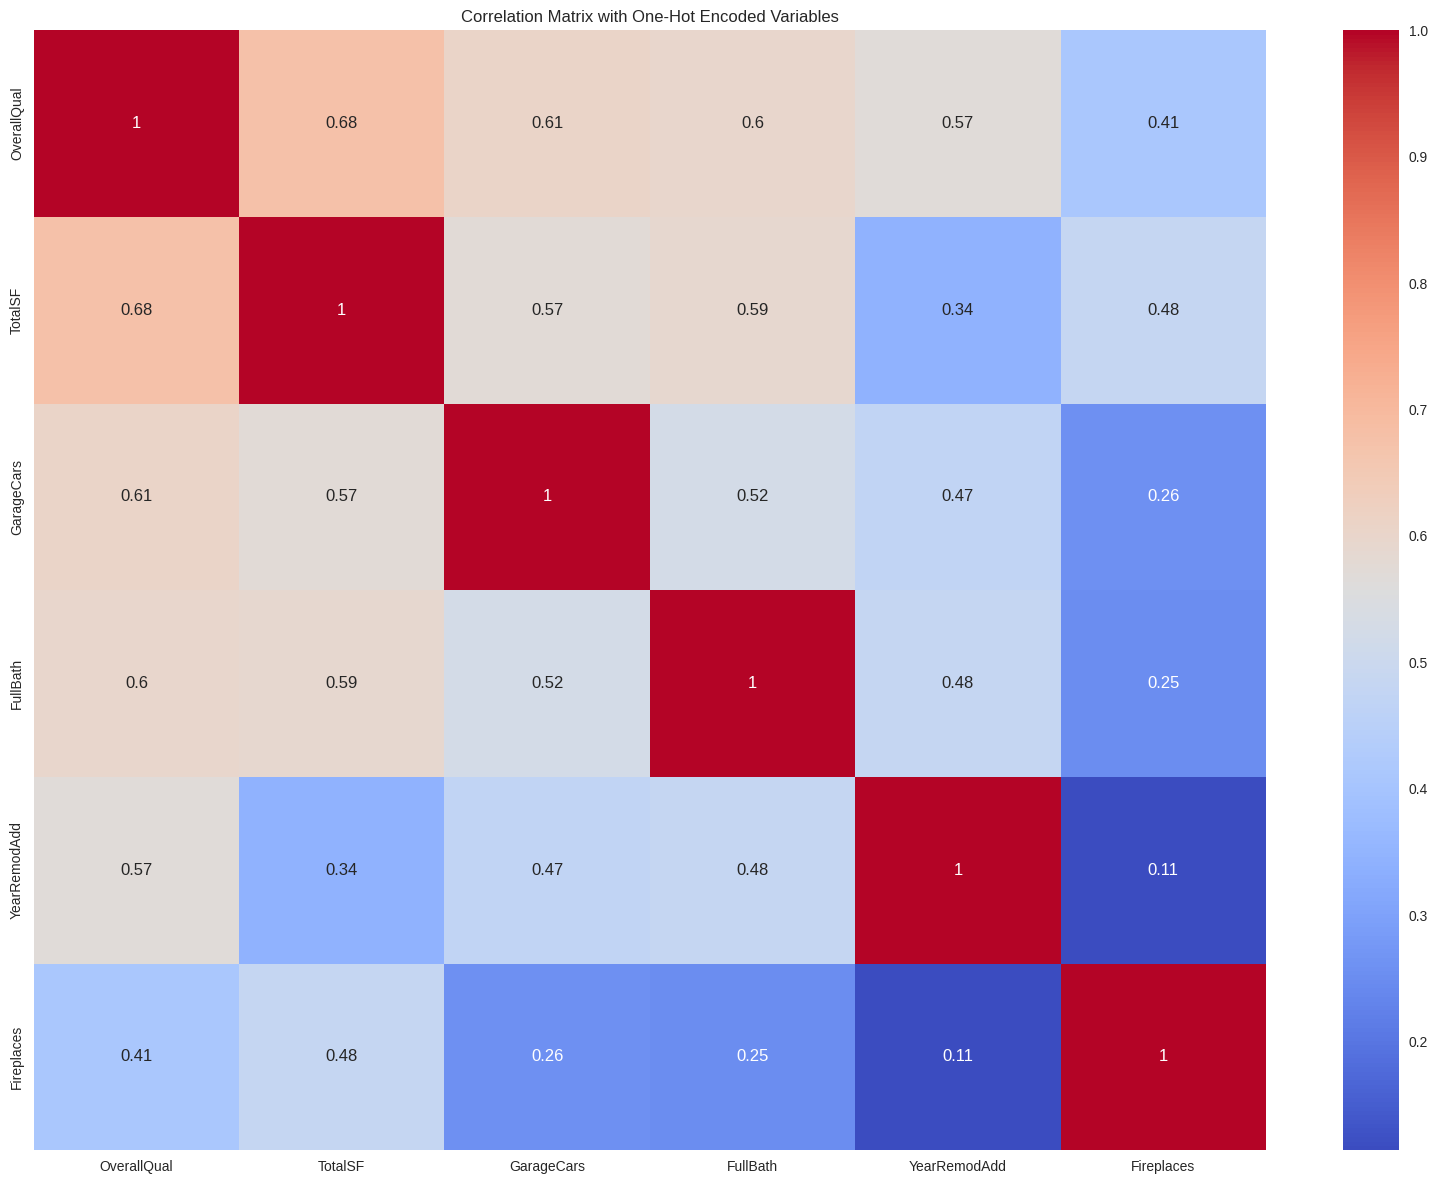

In [54]:
# One-hot encode all categorical variables
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)[features]

# Compute correlation matrix on the fully numerical DataFrame
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix with One-Hot Encoded Variables')
plt.tight_layout()
plt.show()

Se puede observar que ninguna variable tenia una correlación mayor al 70%, que se puede considerar alta, pero estando trabajando con pocas variables se penaliza más la falta de información con la multicolinealidad entre 2 variables.

### Entrenamiento

Con las variables seleccionadas del conjunto anterior se prepararon los conjuntos de prueba para contener solo las variables deseadas.

In [55]:
X_train = train_set[features]
y_train = train_set[target]

In [56]:
X_test = test_set[features]
y_test = test_set[target]

## Modelo con configuración manual

Para la primera prueba se creo un modelo con hiperparámetros configurados manualmente, especificamente solo se indico un máximo de iteraciones de 1000, para el algoritmos de optimización (`max_iter=1000`).

In [65]:
features = ["OverallQual", "TotalSF", "GarageCars", "FullBath", "YearRemodAdd", "Fireplaces"]
X_train = train_set[features]
y_train = train_set["Categoria_Caro"]
X_test = test_set[features]
y_test = test_set["Categoria_Caro"]

pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, random_state=42)
)
pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_pred = pipeline.predict(X_test)

# Predict on test set (you already did this)
y_test_pred = pipeline.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"🔵 Accuracy de entrenamiento: {train_accuracy:.4f}")
print(f"🟢 Accuracy de testeo:     {test_accuracy:.4f}")

print(classification_report(y_test, y_pred, output_dict=False))

🔵 Accuracy de entrenamiento: 0.9159
🟢 Accuracy de testeo:     0.9307
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       182
           1       0.93      0.86      0.89        92

    accuracy                           0.93       274
   macro avg       0.93      0.91      0.92       274
weighted avg       0.93      0.93      0.93       274



Los resultados fueron positivos en general. El *accuracy* curiosamente fue mayor en el conjunto de testeo, lo que puede indicar que hay patrones más marcados en el conjuto de testeo, pero la diferencia se considera insignificativa (~%4). Por tanto el algoritmo **no muestra un overfitting marcado.**

Por otro lado también se puede concluir que el modelo es bueno clasificando ambos tipos de categorías (precision = 95% , recall = 0.93), pero se especializa en casas no caras, al ser las que mayor soporte tienen; esto puede ser respaldado por la matriz de confusión de abajo que resumen los mismos resultados.

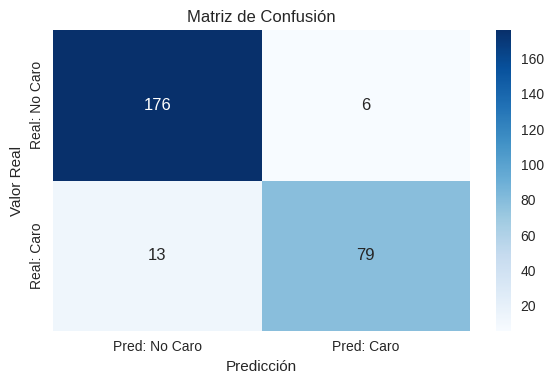

In [ ]:
# 🔍 Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Pred: No Caro", "Pred: Caro"],
    yticklabels=["Real: No Caro", "Real: Caro"]
)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()

A continuación se observa las curvas de aprendizaje para el modelo. Podemos ver que el modelo empieza con un **accuracy** extrañamente alto (94%) que se debe derivar de la naturaleza del dataset de entrenamiento, sin embargo se puede observar como con el crecimiento de la muestra las curvas de aprendizaje de entrenamiento y prueba se estabilizan sin traslaparse totalmente, mostrando un buen nivel e ajuste.

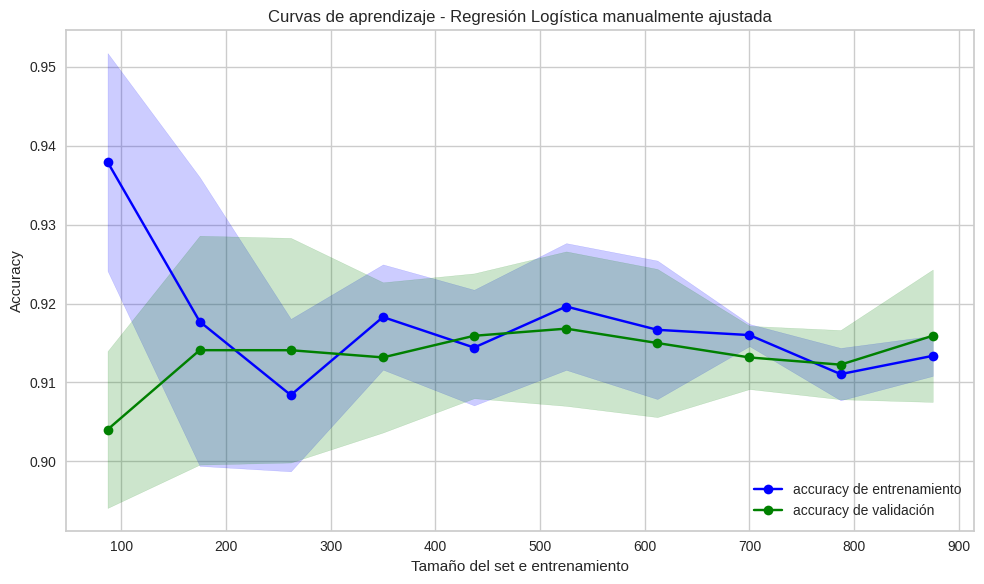

In [69]:
# Define training sizes and get scores
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipeline,
    X=pd.concat([X_train, X_test]),
    y=pd.concat([y_train, y_test]),
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
# Compute mean and std for shaded area
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='accuracy de entrenamiento')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='accuracy de validación')
plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color='green')

plt.title("Curvas de aprendizaje - Regresión Logística manualmente ajustada")
plt.xlabel("Tamaño del set e entrenamiento")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

## Ajusto de hiperparámetros
Se utilizó el algoritmo de GridSearch para poder tunear el mmodelo, 

In [ ]:
features = ["OverallQual", "TotalSF", "GarageCars", "FullBath", "YearRemodAdd", "Fireplaces"]
X_train = train_set[features]
y_train = train_set["Categoria_Caro"]

pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, random_state=42)
)

param_grid = {
    "logisticregression__C": [0.01, 0.1, 1, 10],
    "logisticregression__penalty": ["l2"],
    "logisticregression__solver": ["lbfgs", "liblinear"]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Resultados
print("Mejores parámetros:", grid_search.best_params_)
print("Accuracy promedio en CV:", grid_search.best_score_)

Mejores parámetros: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}
Accuracy promedio en CV: 0.9158536585365853


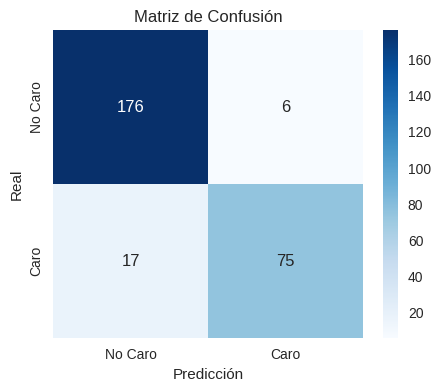

Accuracy en test set: 0.916058394160584
              precision    recall  f1-score   support

     No Caro       0.91      0.97      0.94       182
        Caro       0.93      0.82      0.87        92

    accuracy                           0.92       274
   macro avg       0.92      0.89      0.90       274
weighted avg       0.92      0.92      0.91       274



In [ ]:
X_test = test_set[features]
y_test = test_set["Categoria_Caro"]

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Caro", "Caro"], yticklabels=["No Caro", "Caro"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

print("Accuracy en test set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["No Caro", "Caro"]))

# Conclusiones